In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [9]:
df=pd.read_csv("https://raw.githubusercontent.com/irenebratsis/Thinkful/master/ethereum_dataset.csv")


In [10]:
for col in df.columns: 
    print(col)

Date(UTC)
UnixTimeStamp
eth_etherprice
eth_tx
eth_address
eth_supply
eth_marketcap
eth_hashrate
eth_difficulty
eth_blocks
eth_uncles
eth_blocksize
eth_blocktime
eth_gasprice
eth_gaslimit
eth_gasused
eth_ethersupply
eth_ens_register


In [11]:
non_numeric_columns = df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['Date(UTC)'], dtype='object')
The number of non-numerical columns is 1


In [12]:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['UnixTimeStamp', 'eth_etherprice', 'eth_tx', 'eth_address',
       'eth_supply', 'eth_marketcap', 'eth_hashrate', 'eth_difficulty',
       'eth_blocks', 'eth_uncles', 'eth_blocksize', 'eth_blocktime',
       'eth_gasprice', 'eth_gaslimit', 'eth_gasused', 'eth_ethersupply',
       'eth_ens_register'],
      dtype='object')
The number of numerical columns is 17


In [13]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
eth_ens_register,640,0.685225
eth_ethersupply,0,0.000000
UnixTimeStamp,0,0.000000
eth_etherprice,0,0.000000
eth_tx,0,0.000000
eth_address,0,0.000000
eth_supply,0,0.000000
eth_marketcap,0,0.000000
eth_hashrate,0,0.000000
eth_difficulty,0,0.000000


In [14]:
df.isnull().sum()*100/df.count()


Date(UTC)             0.000000
UnixTimeStamp         0.000000
eth_etherprice        0.000000
eth_tx                0.000000
eth_address           0.000000
eth_supply            0.000000
eth_marketcap         0.000000
eth_hashrate          0.000000
eth_difficulty        0.000000
eth_blocks            0.000000
eth_uncles            0.000000
eth_blocksize         0.000000
eth_blocktime         0.000000
eth_gasprice          0.000000
eth_gaslimit          0.000000
eth_gasused           0.000000
eth_ethersupply       0.000000
eth_ens_register    217.687075
dtype: float64

In [15]:
df.corr()

,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
UnixTimeStamp,1.000000,0.719126,0.751931,0.737892,0.998030,0.714228,0.799439,0.790629,-0.018580,0.412177,0.784365,0.114419,-0.277059,0.760396,0.782997,-0.471521,-0.656220
eth_etherprice,0.719126,1.000000,0.965697,0.959472,0.684217,0.999913,0.940936,0.830485,-0.096938,0.726335,0.931237,0.101525,-0.056474,0.778550,0.951745,-0.662753,-0.448694
eth_tx,0.751931,0.965697,1.000000,0.948858,0.716735,0.965275,0.938709,0.825023,-0.059896,0.762968,0.961355,0.073231,-0.076978,0.806484,0.981541,-0.677751,-0.534415
eth_address,0.737892,0.959472,0.948858,1.000000,0.699377,0.960960,0.978847,0.865705,-0.049113,0.696578,0.921214,0.081544,-0.081722,0.788673,0.958301,-0.690293,-0.583515
eth_supply,0.998030,0.684217,0.716735,0.699377,1.000000,0.678881,0.766949,0.767448,-0.023944,0.374247,0.753543,0.120670,-0.280120,0.734942,0.748822,-0.444549,-0.650840
eth_marketcap,0.714228,0.999913,0.965275,0.960960,0.678881,1.000000,0.940225,0.827592,-0.092000,0.729682,0.929211,0.096609,-0.054597,0.775385,0.950631,-0.660459,-0.453844
eth_hashrate,0.799439,0.940936,0.938709,0.978847,0.766949,0.940225,1.000000,0.935119,-0.168513,0.610231,0.949353,0.202920,-0.105434,0.841444,0.966337,-0.762958,-0.605833
eth_difficulty,0.790629,0.830485,0.825023,0.865705,0.767448,0.827592,0.935119,1.000000,-0.435121,0.399314,0.927948,0.500532,-0.114255,0.828375,0.867115,-0.835569,-0.593650
eth_blocks,-0.018580,-0.096938,-0.059896,-0.049113,-0.023944,-0.092000,-0.168513,-0.435121,1.000000,0.298980,-0.268241,-0.967360,-0.122634,-0.176989,-0.089762,0.650843,-0.050144
eth_uncles,0.412177,0.726335,0.762968,0.696578,0.374247,0.729682,0.610231,0.399314,0.298980,1.000000,0.638092,-0.313990,-0.007124,0.412018,0.714500,-0.231459,-0.412083


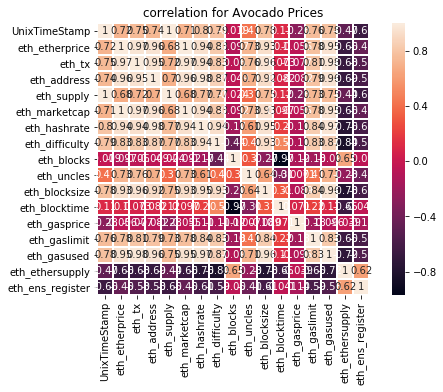

In [16]:
import seaborn as sns

corrmat_df = df.corr()

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_df, square=True, annot=True, linewidths=.5)
plt.title("correlation for Avocado Prices")

plt.show()

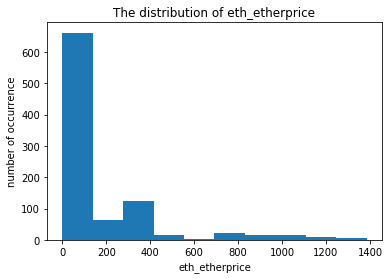

In [18]:
plt.hist(df.eth_etherprice)
plt.title("The distribution of eth_etherprice")
plt.xlabel("eth_etherprice")
plt.ylabel("number of occurrence")
plt.show()

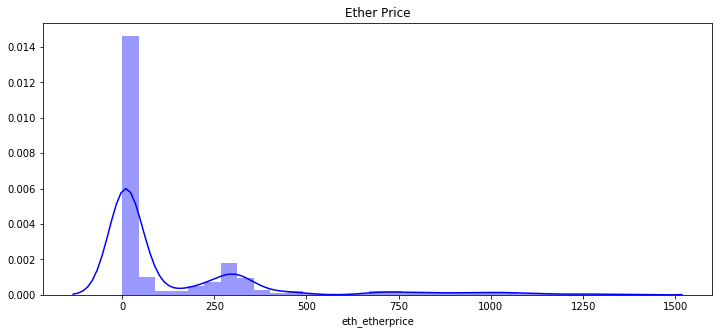

In [19]:
import pylab as pl
pl.figure(figsize=(12,5))
pl.title("Ether Price")
ax = sns.distplot(df["eth_etherprice"], color = 'b')

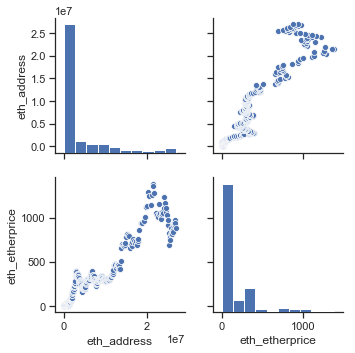

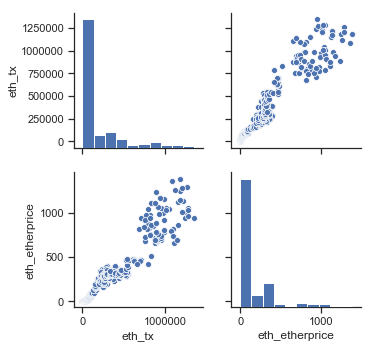

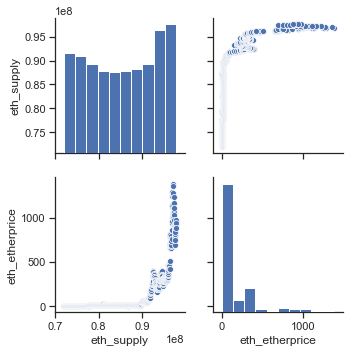

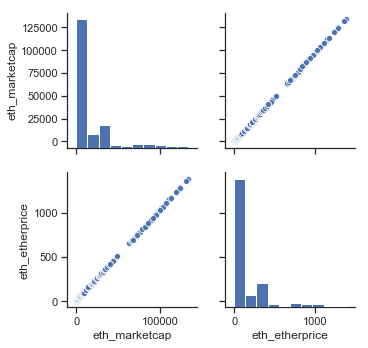

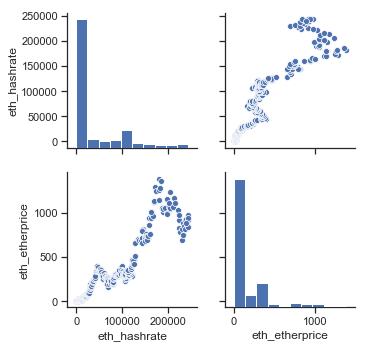

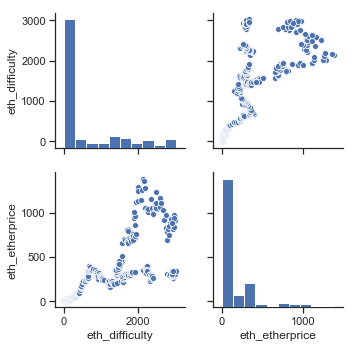

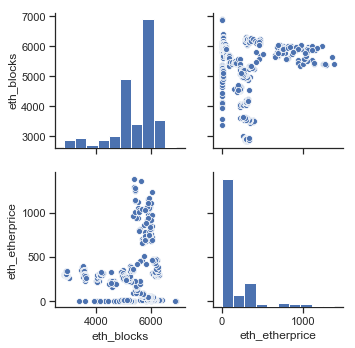

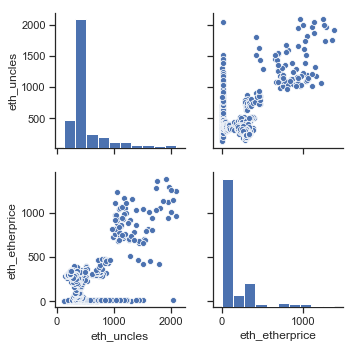

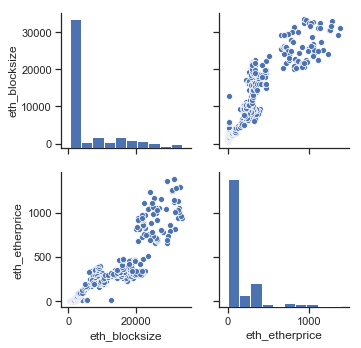

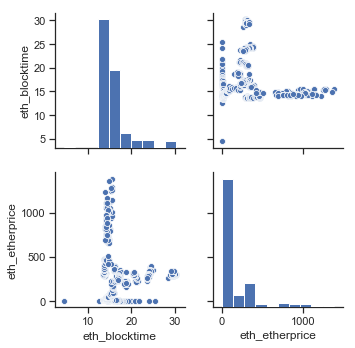

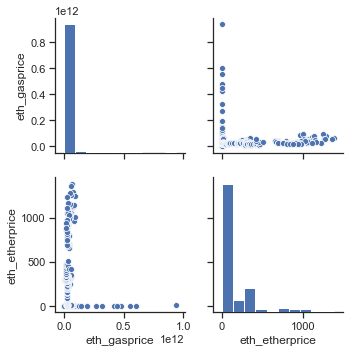

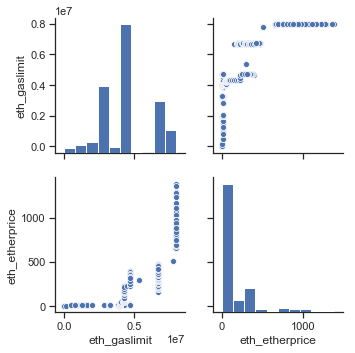

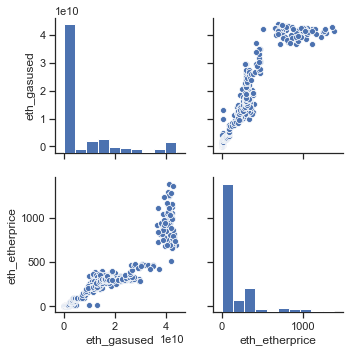

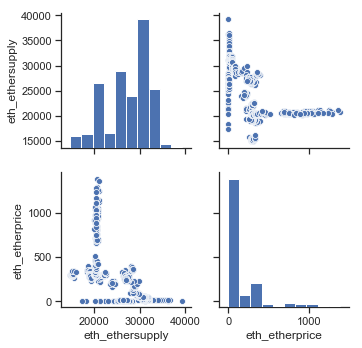

In [21]:

import seaborn as sns
sns.set(style="ticks") 
sns.pairplot(df[['eth_address', 'eth_etherprice']])
sns.pairplot(df[['eth_tx', 'eth_etherprice']])
sns.pairplot(df[['eth_supply', 'eth_etherprice']])
sns.pairplot(df[['eth_marketcap', 'eth_etherprice']])
sns.pairplot(df[['eth_hashrate', 'eth_etherprice']])
sns.pairplot(df[['eth_difficulty', 'eth_etherprice']])
sns.pairplot(df[['eth_blocks', 'eth_etherprice']])
sns.pairplot(df[['eth_uncles', 'eth_etherprice']])
sns.pairplot(df[['eth_blocksize', 'eth_etherprice']])
sns.pairplot(df[['eth_blocktime', 'eth_etherprice']])
sns.pairplot(df[['eth_gasprice', 'eth_etherprice']])
sns.pairplot(df[['eth_gaslimit', 'eth_etherprice']])
sns.pairplot(df[['eth_gasused', 'eth_etherprice']])
sns.pairplot(df[['eth_ethersupply', 'eth_etherprice']])

In [23]:
df[df.columns[1:]].corr()['eth_etherprice'][:]


UnixTimeStamp       0.719126
eth_etherprice      1.000000
eth_tx              0.965697
eth_address         0.959472
eth_supply          0.684217
eth_marketcap       0.999913
eth_hashrate        0.940936
eth_difficulty      0.830485
eth_blocks         -0.096938
eth_uncles          0.726335
eth_blocksize       0.931237
eth_blocktime       0.101525
eth_gasprice       -0.056474
eth_gaslimit        0.778550
eth_gasused         0.951745
eth_ethersupply    -0.662753
eth_ens_register   -0.448694
Name: eth_etherprice, dtype: float64

'eth_tx', 'eth_address', 'eth_marketcap', 'eth_hashrate', 'eth_blocksize', 'eth_gasused', 'eth_gaslimit', 'eth_difficulty', 'eth_uncles'

These are the 9 variables that I found most impactful to eth_etherprice based on the .corr list as well as other data exploration steps done above. For this reason I will be using these variables in my model preparations further in this challenge.

Let's start our model exploration!

First up OLS with R-squared: 1 and TEST R-squared: 1

In [24]:

X = df[['eth_tx', 'eth_address', 'eth_marketcap', 'eth_hashrate', 'eth_blocksize', 'eth_gasused', 'eth_gaslimit', 'eth_difficulty', 'eth_uncles']] 
Y = df['eth_etherprice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(Y_train, X_train).fit()


print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         eth_etherprice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.723e+06
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:05:01   Log-Likelihood:                -1312.7
No. Observations:                 747   AIC:                             2643.
Df Residuals:                     738   BIC:                             2685.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
eth_tx           -2.3e-06   2.15e-06     -1.

In [25]:

X = df[['eth_tx', 'eth_address', 'eth_marketcap', 'eth_hashrate', 'eth_blocksize', 'eth_gasused', 'eth_gaslimit', 'eth_difficulty', 'eth_uncles']] 
Y = df['eth_etherprice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results_TEST = sm.OLS(Y_test, X_test).fit()


results_TEST.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         eth_etherprice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.823e+05
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:05:42   Log-Likelihood:                -337.27
No. Observations:                 187   AIC:                             692.5
Df Residuals:                     178   BIC:                             721.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
eth_tx          8.177e-07   5.37e-06      0.152      0.879   -9.78e-06    1.14e-05
eth_address    -2.719e-06   1.75e-07    -15.512      0.000   -3.07e-06   -2.37e-06
eth_marketcap      0.0105   1.81e-05    577.617      0.000       0.010       0.011
eth_hashrate       0.0001   3.97e-05      3.236      0.001    5.01e-05       0.000
eth_blocksize     -0.0004      0.000     -1.745      0.083      -0.001     5.3e-05
eth_gasused     4.982e-10   9.42e-11      5.286      0.000    3.12e-10    6.84e-10
eth_gaslimit    4.581e-07   7.22e-08      6.347      0.000    3.16e-07       6e-07
eth_difficulty     0.0027      0.002      1.510      0.133      -0.001       0.006
eth_uncles     -8.246e-05      0.001     -0.149      0.882      -0.001       0.001
==============================================================================
Omnibus:                       22.499   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.163
Skew:                           0.636   Prob(JB):                     5.16e-09
Kurtosis:                       4.811   Cond. No.                     2.30e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Next up Ridge, Lasso, ElasticNet and Linear regressions all produced a score of 0.999 for the training set and a 0.999 score for the test set 

Review with technical support***

In [26]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(fit_intercept = False) 
ridgeregr.fit(X_train, Y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))



R-squared of the model on the training set is: 0.9999713058857238
-----Test set statistics-----
R-squared of the model on the test set is: 0.9999643564847516
Mean absolute error of the prediction is: 1.1189283549667521
Mean squared error of the prediction is: 2.2998742227815834
Root mean squared error of the prediction is: 1.5165336207224631
Mean absolute percentage error of the prediction is: 27.77675981600023


In [27]:
from sklearn.linear_model import Lasso

lassoregr = Lasso() 
lassoregr.fit(X_train, Y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))


R-squared of the model on the training set is: 0.9999725153631153
-----Test set statistics-----
R-squared of the model on the test set is: 0.9999653702637393
Mean absolute error of the prediction is: 1.1310840327146165
Mean squared error of the prediction is: 2.234460804789007
Root mean squared error of the prediction is: 1.494811294039822
Mean absolute percentage error of the prediction is: 31.75949918415902


In [28]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet() 
elasticregr.fit(X_train, Y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))


R-squared of the model on the training set is: 0.9999725123494427
-----Test set statistics-----
R-squared of the model on the test set is: 0.9999653892329432
Mean absolute error of the prediction is: 1.1307462640448875
Mean squared error of the prediction is: 2.2332368294741807
Root mean squared error of the prediction is: 1.4944018299889026
Mean absolute percentage error of the prediction is: 31.73889420695334


In [29]:
lrm = LinearRegression()

lrm.fit(X_train, Y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.999972576460603
-----Test set statistics-----
R-squared of the model in test set is: 0.9999657455043224
Mean absolute error of the prediction is: 1.134477004969791
Mean squared error of the prediction is: 2.2102486546114086
Root mean squared error of the prediction is: 1.4866905039756622
Mean absolute percentage error of the prediction is: 31.90991766042813


It doesn't seem like we need it but for fun... let's see what happens if we turn this into a Decision Tree:

In [30]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import pydotplus
import graphviz
from sklearn import tree

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
regressor = DecisionTreeRegressor()


regressor.fit(X_train, Y_train)

print("R-squared of the model in training set is: {}".format(regressor.score(X_train, Y_train)))


R-squared of the model in training set is: 1.0


And a Random Forest:

In [31]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import ensemble

randomforest = RandomForestRegressor()
randomforest.fit(X_train, Y_train)
randomforest.score(X_test, Y_test)





0.9976724321233642

And finally, KNN:

In [33]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)



0.9376224152820262

In [34]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X_train, Y_train)
knn_w.score(X_test, Y_test)


0.9225388204718814

In [35]:
# Adjusting weights to see if there is an improvement in the performance
knn_w2 = neighbors.KNeighborsRegressor(n_neighbors=2, weights='distance')
knn_w.fit(X_train, Y_train)
knn_w.score(X_test, Y_test)


0.9225388204718814